# 군집화 - K-Means Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Iris 데이터 --> 차원축소

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [6]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['PC1'] = iris_pca[:, 0]
df['PC2'] = iris_pca[:, 1]
df['species'] = iris.target
df.head()

,sl,sw,pl,pw,PC1,PC2,species
0,5.1,3.5,1.4,0.2,-2.264703,0.480027,0
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134,0
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908,0
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395,0
4,5.0,3.6,1.4,0.2,-2.389842,0.646835,0


### K-Means 모델 생성/학습

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [8]:
kmeans.fit(iris_std)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [9]:
df['cluster'] = kmeans.labels_
df.tail()

,sl,sw,pl,pw,PC1,PC2,species,cluster
145,6.7,3.0,5.2,2.3,1.870503,0.386966,2,1
146,6.3,2.5,5.0,1.9,1.564580,-0.896687,2,2
147,6.5,3.0,5.2,2.0,1.521170,0.269069,2,1
148,6.2,3.4,5.4,2.3,1.372788,1.011254,2,1
149,5.9,3.0,5.1,1.8,0.960656,-0.024332,2,2


In [10]:
# clustering 결과
df.groupby(['species','cluster']).count()

sl  sw  pl  pw  PC1  PC2
species cluster                          
0       0        50  50  50  50   50   50
1       1        11  11  11  11   11   11
        2        39  39  39  39   39   39
2       1        36  36  36  36   36   36
        2        14  14  14  14   14   14

### 클러스터링 결과 시각화

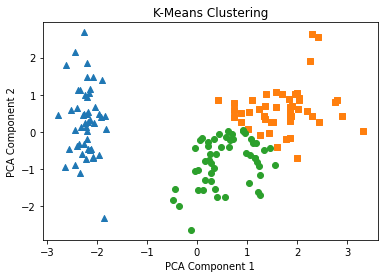

In [12]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()